# Artificial Intelligence
## Image Generator

OpenAI Dall-E (and others) are text-to-image models developed by OpenAI using deep learning methodologies to generate digital images from natural language descriptions, called "prompts".

Reference:

+ https://gemini.google.com/app
+ https://openai.com/index/dall-e-2/
+ https://cloud.google.com/vertex-ai/generative-ai/docs/image/img-gen-prompt-guide
+ https://tech.co/news/use-google-bard-ai-image-generator

## Environment Check

In [ ]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#- Google Colab Check
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
RunningInCOLAB = False
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    print("You are running this notebook in Google Colab.")
else:
    print("You are running this notebook with Jupyter iPython runtime.")

You are running this notebook in Google Colab.


## Libraries

In [ ]:
############################################
# INCLUDES
############################################
#libraries specific to this example
## Imports
#import tensorflow as tf
#from tensorflow import keras

from IPython import display

#a set of libraries that perhaps should always be in Python source
import os
import datetime
import sys
import gc
import getopt
import inspect
import math
import warnings
import textwrap
import random
import glob
import os
import PIL
import time
import subprocess

#images
import imageio
import matplotlib as matplt
import matplotlib.pyplot as plt

#data science
import numpy as np

#a darn useful library for creating paths and one I recommend you load to your environment
from pathlib import Path

from pydoc import help                          # can type in the python console `help(name of function)` to get the documentation

warnings.filterwarnings('ignore')               # don't print out warnings

## Variables

In [ ]:
############################################
# GLOBAL VARIABLES
############################################
DEBUG = 1
DEBUG_DATA = 0

# CODE CONSTRAINTS
VERSION_NAME    = "MLGENIMG"
VERSION_MAJOR   = 0
VERSION_MINOR   = 0
VERSION_RELEASE = 1

#used for values outside standard ASCII, just do it, you'll need it
ENCODING  ="utf-8"

############################################
# GLOBAL CONSTANTS
############################################
BUFFER_SIZE = 60000
BATCH_SIZE = 256
TEXT_WIDTH=77
############################################
# APPLICATION VARIABLES
############################################
start = "\033[1m"
end = "\033[0;0m"

############################################
# GLOBAL CONFIGURATION
############################################
os.environ['PYTHONIOENCODING']=ENCODING


## Function

In [ ]:
def lib_diagnostics():

    try:
        print("System version    #:{:>12}".format(sys.version))
    except Exception as e:
        pass

    try:
        print("  NLTK version    #:{:>12}".format(nltk.__version__))
    except Exception as e:
        pass

    try:
        netcdf4_version_info = nc.getlibversion().split(" ")
        print("netCDF4 version   #:{:>12}".format(netcdf4_version_info[0]))
    except Exception as e:
        pass

    try:
        print("Matplotlib version#:{:>12}".format(matplt.__version__))
    except Exception as e:
        pass

    try:
        print("Numpy version     #:{:>12}".format(np.__version__))
    except Exception as e:
        pass

    try:
        print("Xarray version    #:{:>12}".format(xr.__version__))
    except Exception as e:
        pass

    try:
        print("Pandas version    #:{:>12}".format(pd.__version__))
    except Exception as e:
        pass

    try:
        print("TensorFlow version    #:{:>12}".format(tf.version))
    except Exception as e:
        pass

    try:
        print("Geopandas version #:{:>12}".format(gd.__version__))
    except Exception as e:
        pass

    try:
        print("SciPy version     #:{:>12}".format(sp.__version__))
    except Exception as e:
        pass

    return


## Function Call

In [ ]:
lib_diagnostics()
wrapper = textwrap.TextWrapper(width=TEXT_WIDTH)

System version    #:3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Matplotlib version#:       3.7.1
Numpy version     #:      1.25.2


## Input Sources



## Large Language Model (LLM) ~ Gemini Visual Model (Google)

In [ ]:
#Download Google Vextex/AI Libraries

if RunningInCOLAB:
  #!{sys.executable} -m pip install --upgrade google-cloud-aiplatform  --quiet
  #!{sys.executable} -m pip install -q -U google-generativeai --quiet
  subprocess.run(["pip", "install" , "--upgrade", "google-cloud-aiplatform", "--quiet"])
  subprocess.run(["pip", "install" , "-q", "-U", "google-generativeai", "--quiet"])

from google.cloud import aiplatform
import vertexai.preview

# https://cloud.google.com/colab/docs/run-code-adc
if RunningInCOLAB:
  subprocess.run(["pip", "install" , "google-cloud-secret-manager", "--quiet"])

from google.cloud import secretmanager

In [ ]:
#show your library versions
try:
  print("GCP AI Platform version#:{:>12}".format(aiplatform.__version__))
except Exception as e:
  pass

try:
  print("GCP Vertex version     #:{:>12}".format(vertexai.__version__))
except Exception as e:
  pass

try:
  print("Secret Manager version #:{:>12}".format(secretmanager.__version__))
except Exception as e:
  pass

GCP AI Platform version#:      1.53.0
GCP Vertex version     #:      1.53.0
Secret Manager version #:      2.20.0


In [ ]:
#authenticate so you can use the model
#follow the instructions shown in the executed block below.
#Note that to the right of the "Do you want to continue?" will be a text box you provide "Y" input into.
#Follow the URL, copy the code and paste it next to "browser:" on the subsequent line's text box.

!gcloud auth application-default login


You are running on a Google Compute Engine virtual machine.
The service credentials associated with this virtual machine
will automatically be used by Application Default
Credentials, so it is not necessary to use this command.

If you decide to proceed anyway, your user credentials may be visible
to others with access to this virtual machine. Are you sure you want
to authenticate with your personal account?

Do you want to continue (Y/n)?  y

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=QnGvm99RqnX5ZamgbWKP29ti01IbT0&prompt=consent&token_

In [ ]:
# Setup the required connection for using the model
# Get api key from secret manager
client          = secretmanager.SecretManagerServiceClient()
secret_name     = "usfs-gcp-rand-test-genai-api-key"
secret_version  = "latest"
project_id      = "usfs-tf-admin"
resource_name   = f"projects/{project_id}/secrets/{secret_name}/versions/{secret_version}"
#print(resource_name)

# Get secret
response=client.access_secret_version(request={"name":resource_name})
payload = response.payload.data.decode("UTF-8")
GOOGLE_API_KEY = payload

In [ ]:
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE",
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE",
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE",
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE",
  },
]

In [ ]:
import google.generativeai as genai
from vertexai.preview.vision_models import ImageGenerationModel

# Create the model
# See https://ai.google.dev/api/python/google/generativeai/GenerativeModel

# Create the model
# See https://ai.google.dev/api/python/google/generativeai/GenerativeModel
generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 0,
  "max_output_tokens": 2048,
  "response_mime_type": "text/plain",
}

model_definition="gemini-1.5-pro"
model_definition="imagegeneration@006"

model = ImageGenerationModel.from_pretrained(model_definition)

## Create Your Picture Prompt

In [ ]:
#options for creating an image
style=["normal", "abstract", "surrealism", "cubism", "impressionism", "3d", "expressionist painting", "manga", "pop art", "pencil sketch", "watercolor"]
detail=["normal", "realistic", "ultrarealistic", "photorealistic", "photorealistic", "photorealistic", "photorealistic", "photorealistic", "photorealistic", "intricate", "highly detailed"]
position=["normal", "on the wall", "in the background", "in the foreground", "in the middle", "in the left", "in the right"]
mood=["normal", "stunning", "elegant", "radiant", "delicate", "cute", "striking" "glamorous"]
lights=["normal", "warm lighting", "natural lighting", "cold lighting", "dark aesthetic", "red tones", "blue tones"]
viewpoint=["portrait", "landscape", "close-up", "headshot", "mid-range", "3/4 shot", "full body shot", "wide shot", "low angle shot", "high angle shot"]
subject=["penguin", "bear", "tree", "dog", "cat"]
verb=["running", "surfing", "on the computer", "sleeping", "eating", "playing", "dancing", "sitting", "standing", "walking"]



#generate a picture from random choices above
picture_prompt=f"{style[random.randint(0, len(style)-1)]} \
 {detail[random.randint(0, len(detail)-1)]} \
 {position[random.randint(0, len(position)-1)]} \
 {mood[random.randint(0, len(mood)-1)]} \
 {lights[random.randint(0, len(lights)-1)]} \
 {viewpoint[random.randint(0, len(viewpoint)-1)]}\
 {subject[random.randint(0, len(subject)-1)]} \
 {verb[random.randint(0, len(verb)-1)]}"

#examples
#picture_prompt="magazine style, 4k, photorealistic, modern red armchair, natural"
#picture_prompt="oil painting, 4k, happy bear surfing"


#format the output to make it legible
string = wrapper.fill(text=picture_prompt)
print(string)


surrealism  photorealistic  in the background  normal  dark aesthetic  mid-
range bear  dancing


## Execute the Image Generation

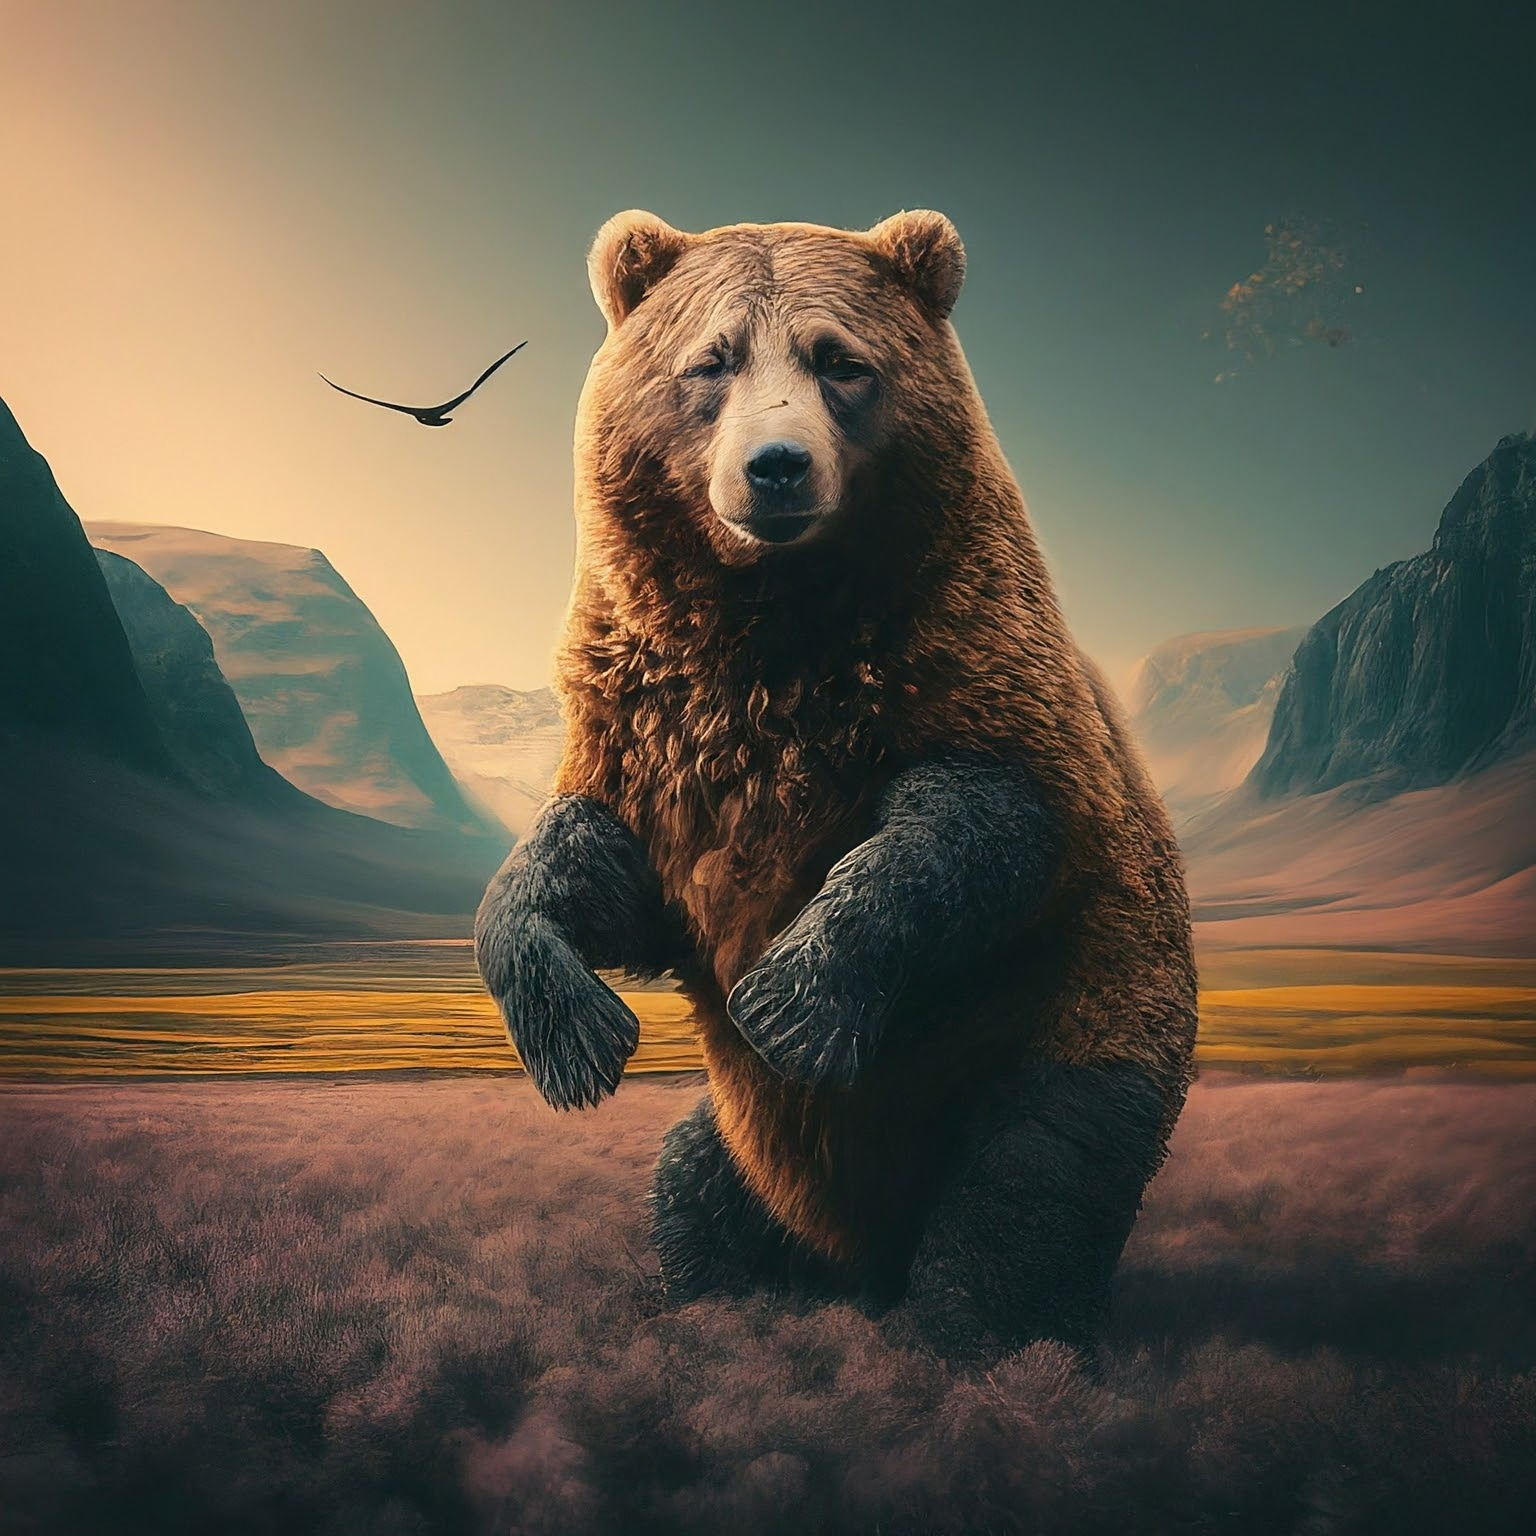

Created output image using 2681070 bytes


In [ ]:


try:
  images = model.generate_images(
      prompt=picture_prompt,

      # Optional parameters
      number_of_images=1,
      language="en",

      # You can't use a seed value and watermark at the same time.
      # add_watermark=False,
      # seed=100,
      aspect_ratio="1:1",
      safety_filter_level="block_some",
      person_generation="allow_adult",
  )

  try:
    output_file="./folderOnColab/output.png"
    images[0].save(location=output_file, include_generation_parameters=False)
  except Exception as e:
    print("There was a problem saving your image.")
    print(f"{start}See exception:{end} ")
    string = wrapper.fill(text=str(e))
    print(string)
    print(f"Your save location was {output_file}.")

  # Optional. View the generated image in a notebook.
  try:
    images[0].show()
    print(f"Created output image using {len(images[0]._image_bytes)} bytes")
  except Exception as e:
    print("There was a problem displaying your image.")
    print(f"{start}See exception:{end} ")
    string = wrapper.fill(text=str(e))
    print(string)

except Exception as e:
  print("There was a problem creating your image.")
  print("\n")
  print(f"{start}See exception:{end} ")
  string = wrapper.fill(text=str(e))
  print(string)
  print("\n")
  print(f"{start}Your prompt was:{end} ")
  string = wrapper.fill(text=picture_prompt)
  print(string)




In [ ]:
s